In [2]:
# Package imports 
import zipfile
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.1 MB/s eta 0:00:00


In [168]:
from wordcloud import WordCloud

In [5]:
# Unzipping folder function that takes in a zip_path (where the zip file is located) 
# and a destination path (where the unzipped files should go) 
def unzip_folder(zip_path, dest_path):
    
    with zipfile.ZipFile(zip_path, "r") as zip_file:
        zip_file.extractall(dest_path)

In [8]:
# Setting path variables 
zip_path = r"'/Users/nyanlintun/Desktop/fall2024/Instacart Market Basket Analysis (2).zip'" # points to zip file
dest_path = r"/Users/nyanlintun/Desktop/asnmnt1" # points to where files should be unzipped after running unzip_file() function

# Run function using path variables 
# unzip_folder(zip_path, dest_path)

In [11]:
# Begin looping through zipped folder 
for root, dirs, files in os.walk(zip_path):
    # Loop through files of zipped folders all at once 
    for file in files:
        if file.endswith(".zip"):
            # Create path that points directly to zipped file 
            full_file_path = os.path.join(root, file)
            # Run unzip_folder() using new full_file_path and destination
            unzip_folder(full_file_path, dest_path)

In [18]:
# Read the Instacart data into dataframes 
# Change directories to where unzipped Instacart data is located 
working_directory = r"/Users/nyanlintun/Desktop/fall2024/"
os.chdir(working_directory)

In [21]:
# List the files in my current working directory 
sourcefiles = os.listdir(working_directory)
sourcefiles

['archive (1)',
 'products.csv',
 'order_products__prior.csv.zip',
 'orders.csv',
 '.DS_Store',
 'order_products__train.csv.zip',
 'archive',
 'aisles.csv.zip',
 'Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv',
 'order_products__train.csv',
 '16k_Movies.csv',
 'departments.csv',
 'Marketing Campaign Archive',
 'public_emdat_project.xlsx',
 '__MACOSX',
 'aisles.csv',
 'orders.csv.zip',
 'departments.csv.zip',
 'ClassicDisco.csv',
 'order_products__prior.csv',
 'Instacart Market Basket Analysis (2).zip',
 'products.csv.zip',
 'sample_submission.csv.zip',
 'Instacart Market Basket Analysis',
 'sample_submission.csv']

In [39]:
# Begin looping through sourcefiles
for file in sourcefiles:
    if file == "aisles.csv":
        aisles_df = pd.read_csv(file)
        print(f'{file} loaded with shape: {aisles_df.shape}')
    
    elif file == "departments.csv":
        departments_df = pd.read_csv(file)
        print(f'{file} loaded with shape: {departments_df.shape}')
    
    elif file == "order_products__prior.csv":
        order_products_prior_df = pd.read_csv(file)
        print(f'{file} loaded with shape: {order_products_prior_df.shape}')
    
    elif file == "orders.csv":
        orders_df = pd.read_csv(file)
        print(f'{file} loaded with shape: {orders_df.shape}')
    
    elif file == "products.csv":
        products_df = pd.read_csv(file)
        print(f'{file} loaded with shape: {products_df.shape}')

products.csv loaded with shape: (49688, 4)
orders.csv loaded with shape: (3421083, 7)
departments.csv loaded with shape: (21, 2)
aisles.csv loaded with shape: (134, 2)
order_products__prior.csv loaded with shape: (32434489, 4)


In [42]:
# Below we are using list comprehension (a backwards for loop) to only take the first part (i.e. only grab 'aisles' from 'aisles.csv') of the .csv file name
file_names = [os.path.splitext(file)[0] for file in sourcefiles if file.endswith(".csv")]
print(file_names)

# For this next part, we will be using dictionary comprehension which is exactly like list comprehension, but for dictionaries
# The keys for our dictionary will be the file names and the values will the different dataframes 
dfs = {key: pd.read_csv(os.path.join(working_directory, file)) for key, file in zip(file_names, sourcefiles) if file.endswith(".csv")}

['products', 'orders', 'Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020)', 'order_products__train', '16k_Movies', 'departments', 'aisles', 'ClassicDisco', 'order_products__prior', 'sample_submission']


In [55]:
print(dfs.keys())

dict_keys(['orders', 'order_products__train', 'order_products__prior', 'sample_submission'])


In [61]:
# Shape of each dataframe
for key,value in dfs.items():
    print(f"{key}: {value.shape}")

orders: (49688, 4)
order_products__train: (3421083, 7)
order_products__prior: (301, 8)
sample_submission: (1384617, 4)


# MERGE

In [64]:
#Merge the orders, products, and order_products_prior dataframes on “order_id” and “product_id”
orders_merged = pd.merge(orders_df, order_products_prior_df, on = "order_id", how = "left")
orders_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0


In [67]:
aisle_product_merged = pd.merge(aisles_df, products_df, on = "aisle_id", how = "inner")
aisle_product_merged.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


In [70]:
#  Merge dataframes to show products, aisles, and departments they are found in
department_aisle_merged = pd.merge(aisle_product_merged, departments_df, on = "department_id", how = "inner")
department_aisle_merged.shape

(49688, 6)

In [73]:
#  Merge the orders, products, and order_products_prior dataframes on “order_id” and “product_id” 
orders_product_merged = pd.merge(orders_merged, products_df, on = "product_id", how = "inner")
orders_product_merged.shape

(32434489, 13)

# EDA

In [77]:
#summary statistics
department_aisle_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
aisle_id,49688.0,67.769582,38.316162,1.0,35.00,69.0,100.00,134.0
product_id,49688.0,24844.500000,14343.834425,1.0,12422.75,24844.5,37266.25,49688.0
department_id,49688.0,11.728687,5.850410,1.0,7.00,13.0,17.00,21.0


In [81]:
orders_product_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,32434489.0,1.710749e+06,987300.696453,2.0,855943.0,1711048.0,2565514.0,3421083.0
user_id,32434489.0,1.029372e+05,59466.478268,1.0,51421.0,102611.0,154391.0,206209.0
order_number,32434489.0,1.714205e+01,17.535040,1.0,5.0,11.0,24.0,99.0
order_dow,32434489.0,2.738818e+00,2.090049,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,32434489.0,1.342498e+01,4.246365,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,30356421.0,1.110407e+01,8.778914,0.0,5.0,8.0,15.0,30.0
product_id,32434489.0,2.557634e+04,14096.689090,1.0,13530.0,25256.0,37935.0,49688.0
add_to_cart_order,32434489.0,8.351076e+00,7.126671,1.0,3.0,6.0,11.0,145.0
reordered,32434489.0,5.896975e-01,0.491889,0.0,0.0,1.0,1.0,1.0
aisle_id,32434489.0,7.121430e+01,38.203023,1.0,31.0,83.0,107.0,134.0


In [84]:
department_aisle_merged.isnull().sum()

aisle_id         0
aisle            0
product_id       0
product_name     0
department_id    0
department       0
dtype: int64

In [87]:
orders_product_merged.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
dtype: int64

In [90]:
department_aisle_merged.head()

,aisle_id,aisle,product_id,product_name,department_id,department
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli
1,1,prepared soups salads,554,Turkey Chili,20,deli
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20,deli
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20,deli
4,1,prepared soups salads,2539,Original Potato Salad,20,deli


In [93]:
orders_product_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23,19
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23,19
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54,17


In [96]:
department_aisle_merged["product_name"].value_counts()

product_name
Italian Pasta Salad                               1
Blueberry Scones                                  1
Original Whole Grain English Muffins              1
Organic Sprouted English Muffin                   1
Hearty Grains 100% Whole Wheat English Muffins    1
                                                 ..
Bar Dark Chocolate Hazelnut Bar                   1
Peppermint Crunch Thins                           1
Gin-Gins Hard Ginger Candy Double Strength        1
Dark Chocolate With Almonds                       1
Porto                                             1
Name: count, Length: 49688, dtype: int64

# Top 10 most ordered

In [100]:
Top_10_product = orders_product_merged["product_name"].value_counts().head(10)
Top_10_product

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64

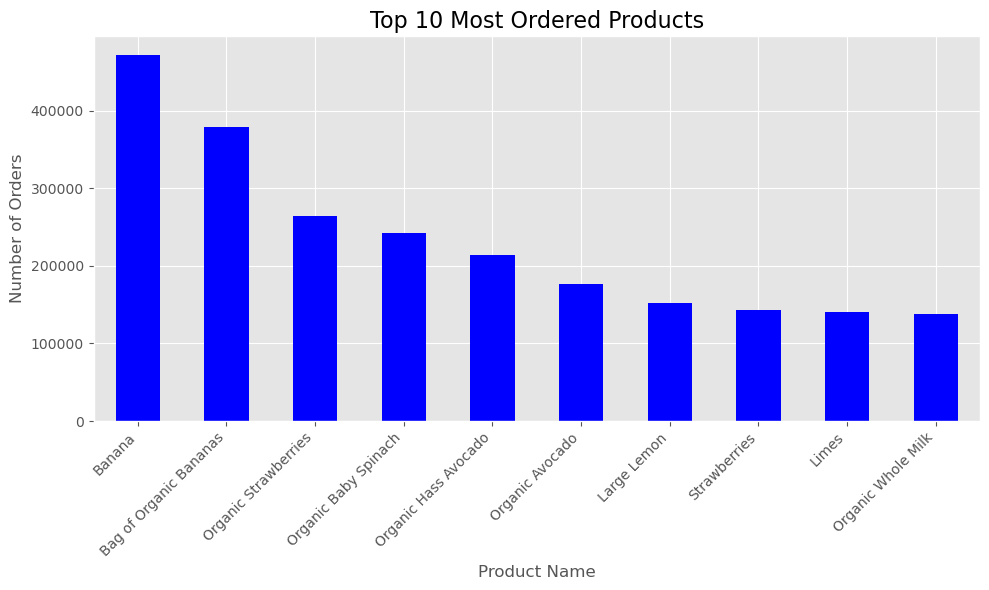

In [107]:
# Set a different style, e.g., 'ggplot', 'seaborn', 'fivethirtyeight'
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
Top_10_product.plot(kind='bar', color='blue')

plt.title('Top 10 Most Ordered Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The top products are mainly fresh fruits and 6 out of 10 products are organic.

# Barplot

In [113]:
orders_product_merged["reordered"].value_counts()

reordered
1.0    19126536
0.0    13307953
Name: count, dtype: int64

In [116]:
reorder = orders_product_merged[orders_product_merged["reordered"] == 1]

Top_10_reordered = reorder["product_name"].value_counts().head(10)
Top_10_reordered

product_name
Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Organic Avocado           134044
Organic Whole Milk        114510
Large Lemon               106255
Organic Raspberries       105409
Strawberries               99802
Name: count, dtype: int64

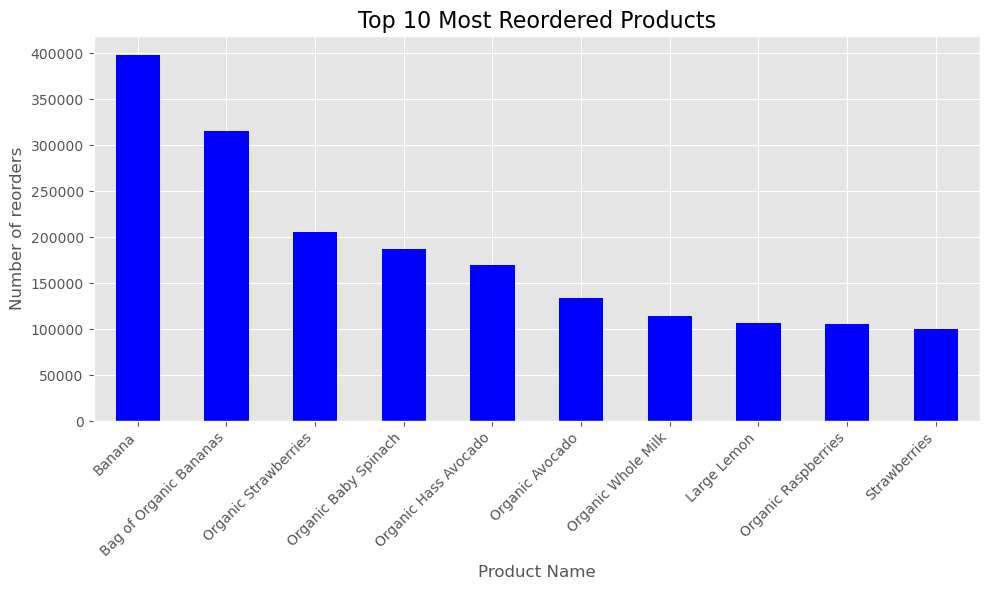

In [121]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))  
Top_10_reordered.plot(kind='bar', color='blue')

plt.title('Top 10 Most Reordered Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of reorders', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

Bananas are the most reordered products. Organic products are reordered alot.

# Most Ordered Department or Aisle


In [129]:
departments = department_aisle_merged["department"].value_counts()
Top_10_department = departments.head(10)
Top_10_department

department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
Name: count, dtype: int64

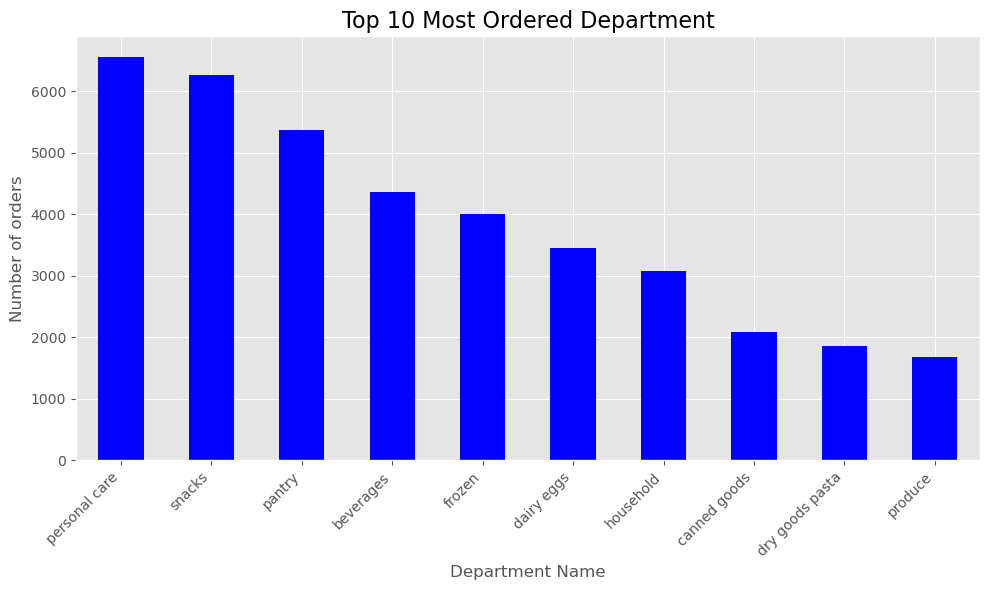

In [132]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))  
Top_10_department.plot(kind='bar', color='blue')

plt.title('Top 10 Most Ordered Department', fontsize=16)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Number of orders', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

Customers tend to buy long lasting products such as snacks, forzen, canned goods.

In [141]:
# Dictionary for mapping day indices to day names
dow_mapping = {
     0: "Sunday",
     1: "Monday",
     2: "Tuesday",
     3: "Wednesday",
     4: "Thursday",
     5: "Friday",
     6: "Saturday"
 }

orders_product_merged["order_dow"] = orders_product_merged["order_dow"].map(dow_mapping)

# Changing dow to category type
orders_product_merged["order_dow"] = orders_product_merged["order_dow"].astype('category')

In [144]:
dow =  orders_product_merged["order_dow"].value_counts().sort_values(ascending=True)
dow

order_dow
Thursday     3787215
Wednesday    3844117
Friday       4209533
Tuesday      4217798
Saturday     4500304
Monday       5665856
Sunday       6209666
Name: count, dtype: int64

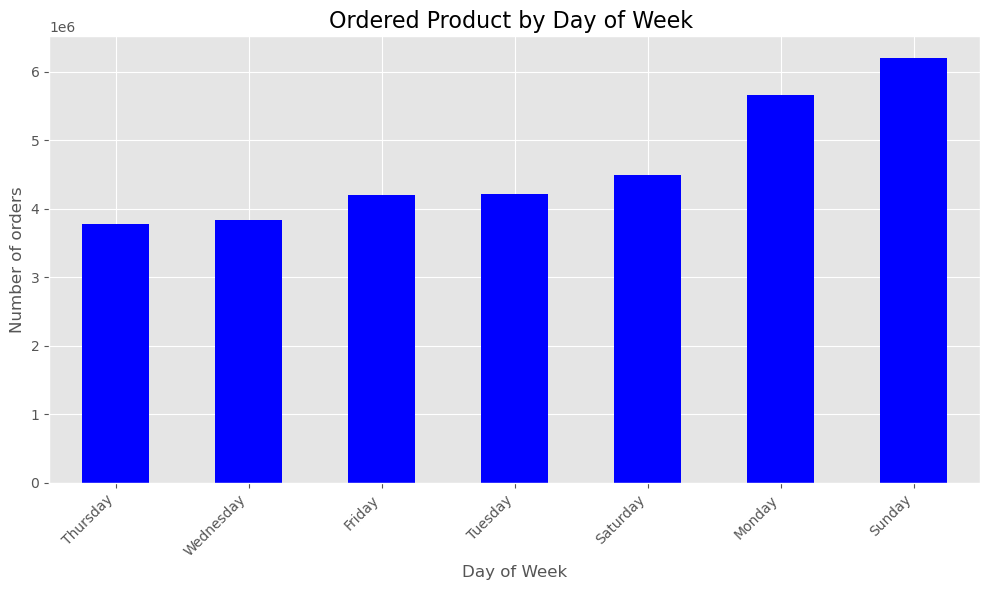

In [147]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))  
dow.plot(kind='bar', color='blue')

plt.title('Ordered Product by Day of Week ', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of orders', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

People tend to restock at the end or start of the week. Low orders on Thursday and Wednesday shows people work on those days. 

# What hour of the day are customers most likely to order a product?

In [155]:
Top_5_hrs = orders_product_merged["order_hour_of_day"].value_counts()
Top_5_hrs.head()

order_hour_of_day
10    2764426
11    2738582
14    2691548
15    2664533
13    2663292
Name: count, dtype: int64

# A word cloud of products to show the most ordered product

In [170]:
product_dict = Top_10_product.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(product_dict)

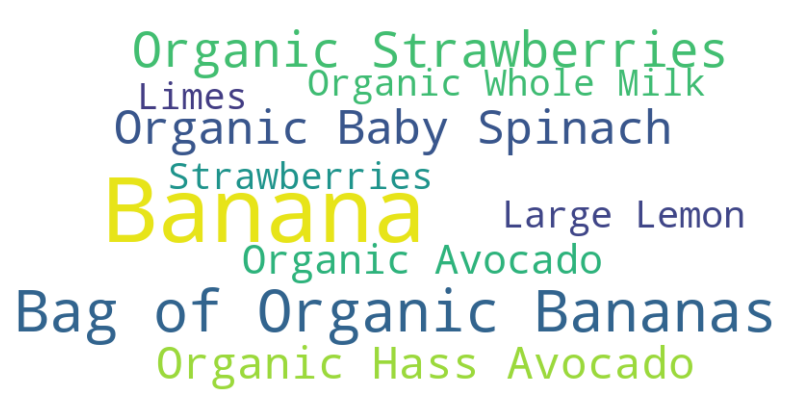

In [173]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis
plt.show()

Bananas are ordered more often than other products. The word cloud contains only healthy organic products.

# Heatmap showing the frequency of orders at different times of the day and days of the week

In [188]:
orders_product_merged.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id'],
      dtype='object')

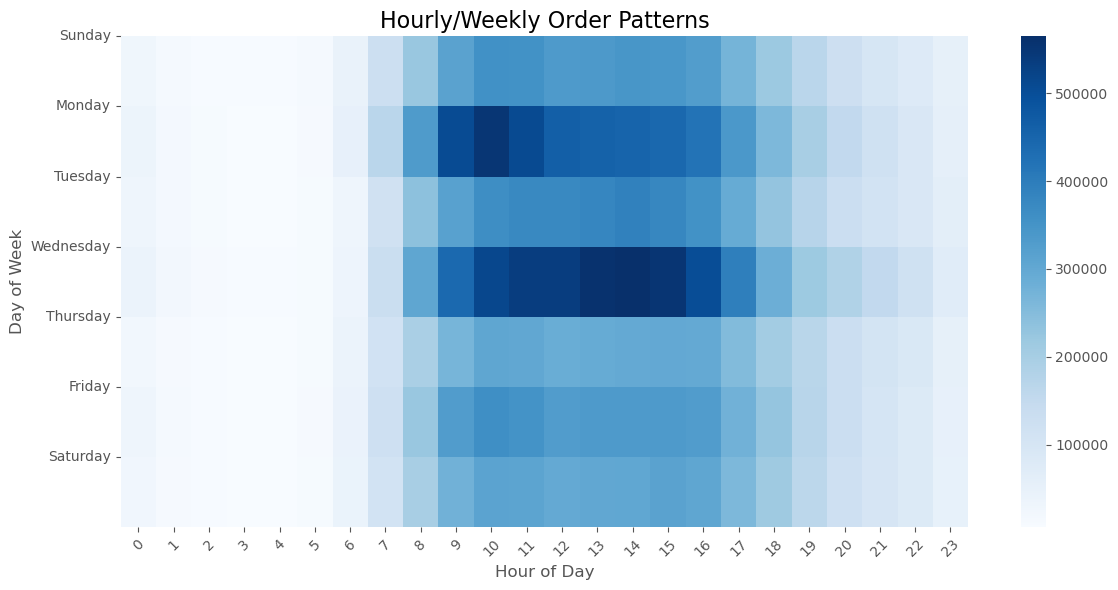

In [192]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=False, cbar=True)

plt.title("Hourly/Weekly Order Patterns", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)

plt.xticks(rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6], ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=0)

plt.tight_layout()
plt.show()

Throughout the week, most products are ordered during 9am to 3pm. There are low orders on Friday, Saturday and Sunday.

# Reorder Probability Heatmap

In [200]:
reorder_prob_by_product = orders_product_merged.groupby('product_name')['reordered'].mean().reset_index()

# Sort products by reorder probability
reorder_prob_by_product = reorder_prob_by_product.sort_values(by='reordered', ascending=False).head(10)  # Take top 10 products for visualization

# Create a pivot table for heatmap (if we want to categorize by products)
heatmap_data = reorder_prob_by_product.pivot_table(index='product_name', 
                                                   values='reordered')

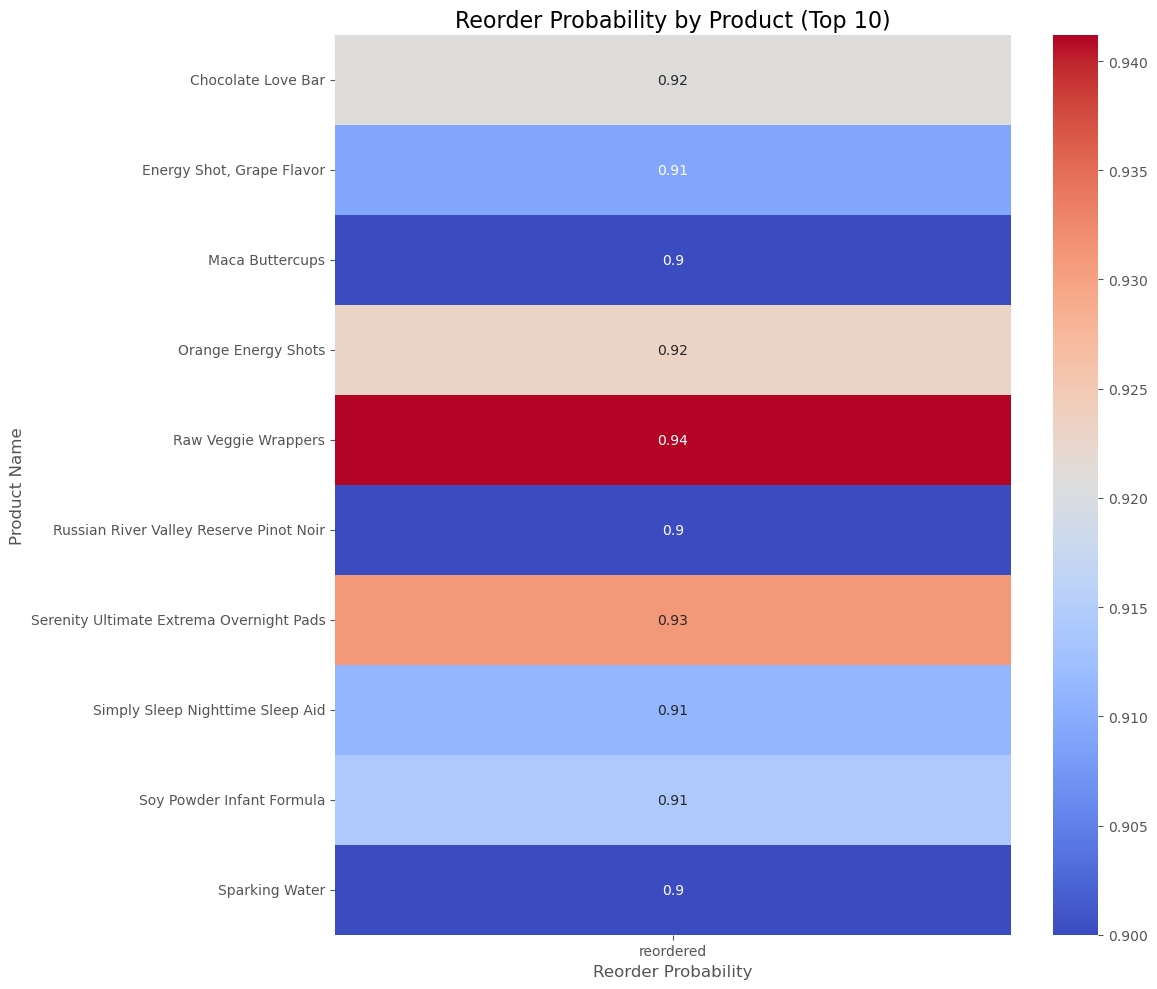

In [206]:
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)

plt.title("Reorder Probability by Product (Top 10)", fontsize=16)
plt.xlabel("Reorder Probability", fontsize=12)
plt.ylabel("Product Name", fontsize=12)

plt.tight_layout()
plt.show()

All of these products are likely to be reordered due to the probability being 0.90 and above.

# Proportion of Reordered vs. New Products

In [215]:
reorder_counts_by_product = orders_product_merged.groupby(['product_name', 'reordered']).size().unstack(fill_value=0)

# Normalize to get proportions (convert counts to proportions)
reorder_proportions_by_product = reorder_counts_by_product.div(reorder_counts_by_product.sum(axis=1), axis=0)

top_products = reorder_proportions_by_product.sum(axis=1).sort_values(ascending=False).head(10)
reorder_proportions_by_top_products = reorder_proportions_by_product.loc[top_products.index]

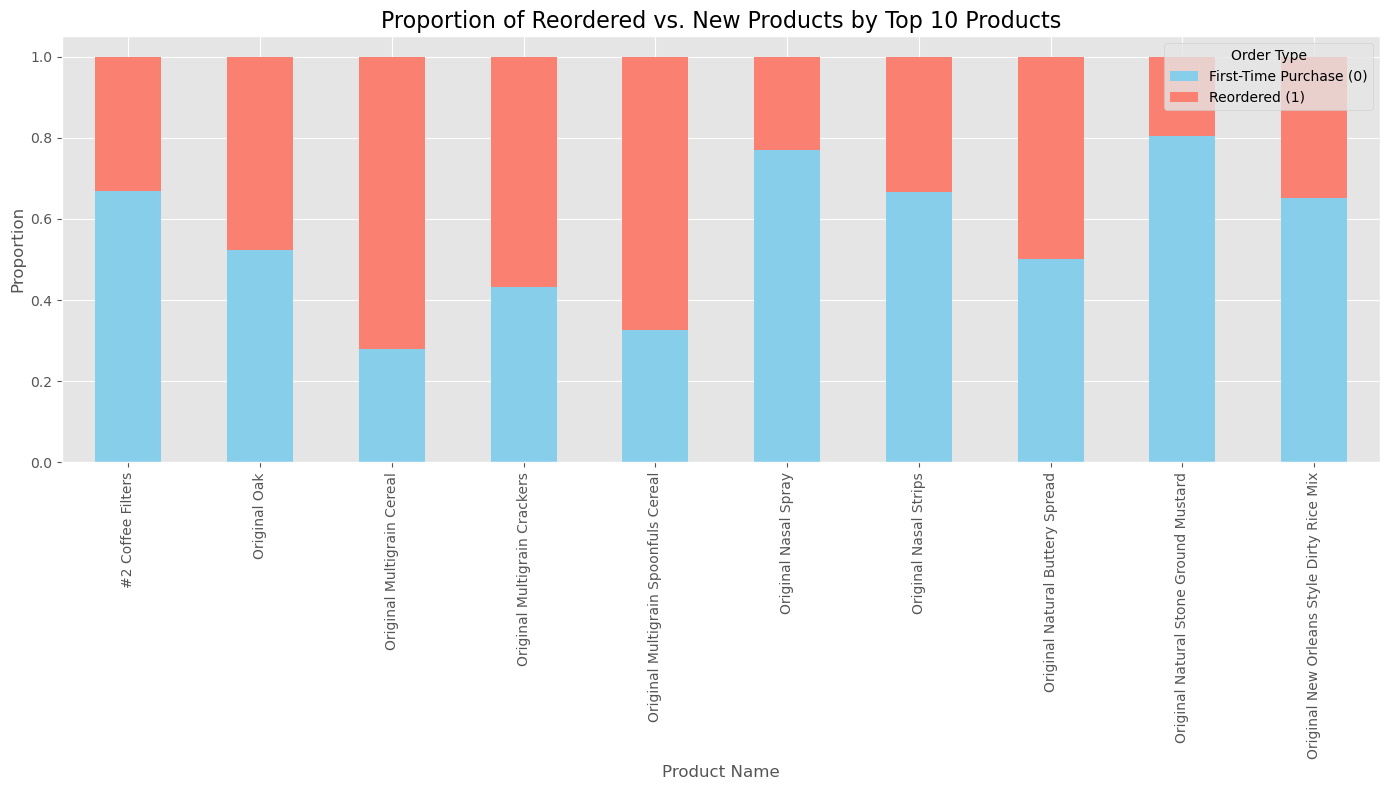

In [218]:
# stacked bar chart for top 20 products
reorder_proportions_by_top_products.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'salmon'])

plt.title('Proportion of Reordered vs. New Products by Top 10 Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

plt.legend(['First-Time Purchase (0)', 'Reordered (1)'], title='Order Type', fontsize=10)

plt.tight_layout()
plt.show()

Customers really liked the Original Multigrain Cereal. The reorder of it is the highest.

# Customer Behavior by Order Size

In [223]:
order_sizes = orders_product_merged.groupby('order_id').size()

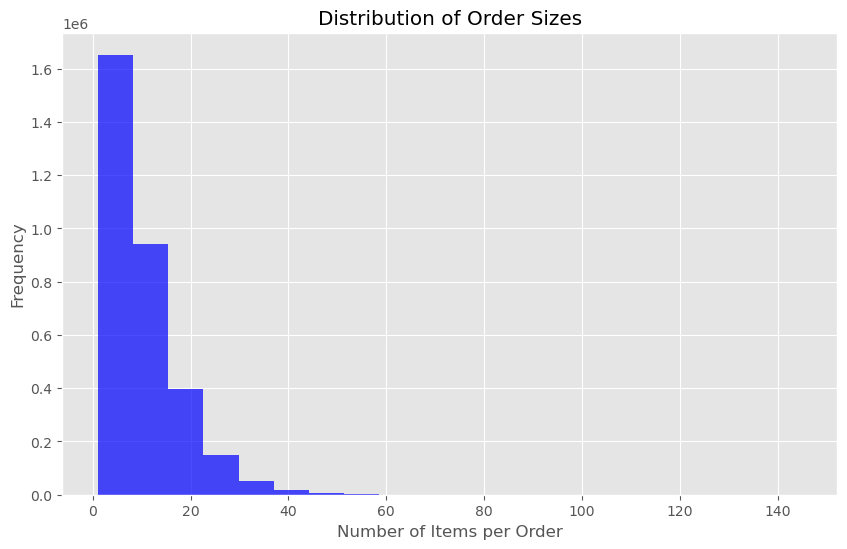

In [226]:
customer_order_sizes = orders_product_merged.groupby(['user_id', 'order_id']).size().reset_index(name='order_size')


plt.figure(figsize=(10, 6))
plt.hist(order_sizes, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Order Sizes')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

People tend to make smaller order, less than 5. Maximum items ordered is around 58 or 59.

# Loyalty Analysis

In [286]:
# mean of the 'reordered' column
customer_reorder_percentage = orders_product_merged.groupby('user_id')['reordered'].mean().reset_index()

In [288]:
top_customers = customer_reorder_percentage.sort_values(by='reordered', ascending=False).head(20)


/var/folders/2j/5p4wbfd92mq75p87vqzl3m900000gn/T/ipykernel_7364/4267009532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_id', y='reordered', data=top_customers, palette='Blues_d')


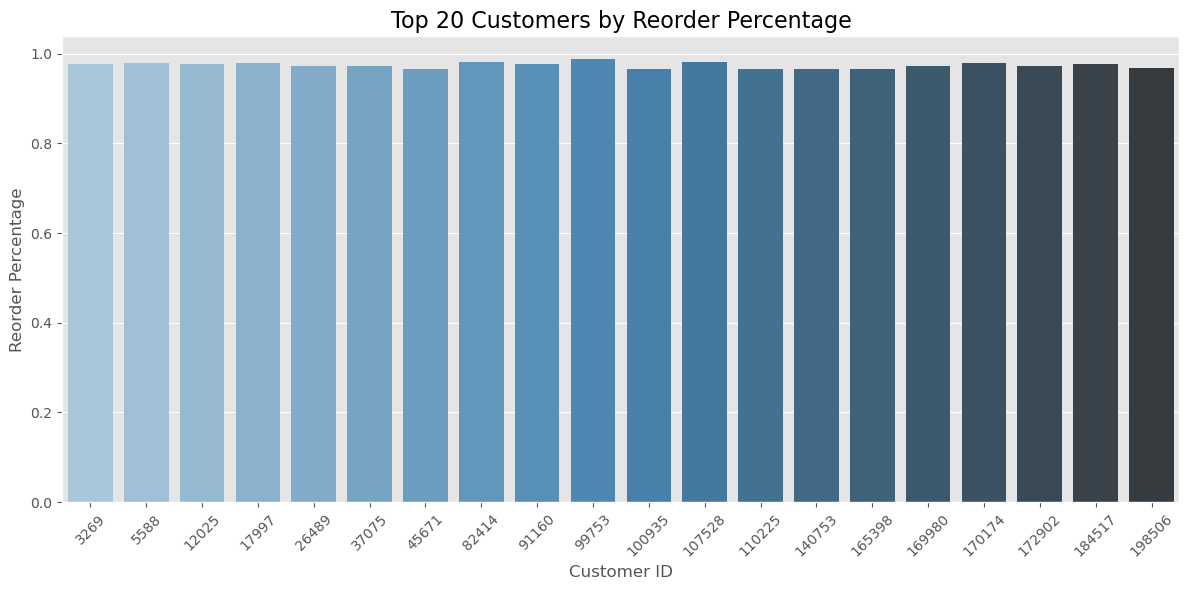

In [293]:
plt.figure(figsize=(12, 6))
sns.barplot(x='user_id', y='reordered', data=top_customers, palette='Blues_d')

plt.title('Top 20 Customers by Reorder Percentage', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Reorder Percentage', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Customers are more likely to reorder what they like. I also believe they'll be a